#### Airline Ticket Price Analysis

<img src="https://media1.tenor.com/m/4w8iHWbJGLMAAAAC/airplane-a340.gif" style="width:1400px; height:500px;">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
File_path = r'Dataset\Indian_Airlines.csv'
df = pd.read_csv(File_path)
df.head(10)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954



The various features of the dataset are explained below:

* _Airline_: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* _Flight_: Flight stores information regarding the plane's flight code. It is a categorical feature.
* _Source City_: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* _Departure Time_: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* _Stops_: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* _Arrival Time_: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* _Destination City_: City where the flight will land. It is a categorical feature having 6 unique cities.
* _Class_: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* _Duration_: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 
* _Days Left_: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* _Price_: Target variable stores information of the ticket price.

In [3]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [4]:
df.shape

(300153, 12)

In [5]:
# check for every object type column unique values
for col in df:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops ['zero' 'one' 'two_or_more']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class ['Economy' 'Business']


#### Exploratory Data Analysis

*_What are number of flights operated by each airline?_*

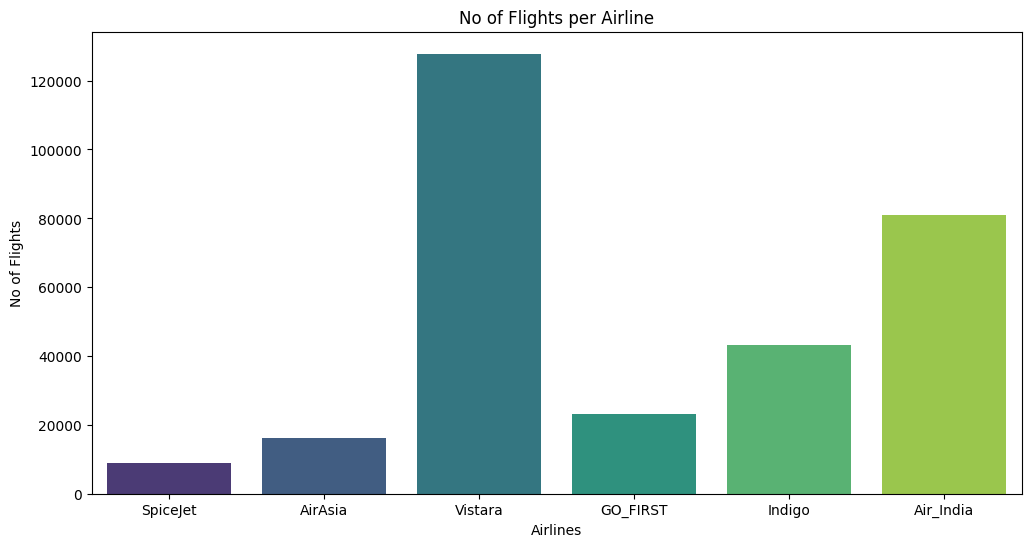

In [6]:
plt.figure(figsize=(12,6))
no_of_flights = sns.countplot(x='airline', data=df, palette='viridis')
no_of_flights.set(xlabel='Airlines', ylabel='No of Flights',title='No of Flights per Airline')
plt.show(no_of_flights)


*_From the above figure , we can see 'Vistara' has maximum no. of flights followed by 'Air india' while 'Spice Jet' has least no. of flights._*

2. *_What is price range acording to class of travel?_*

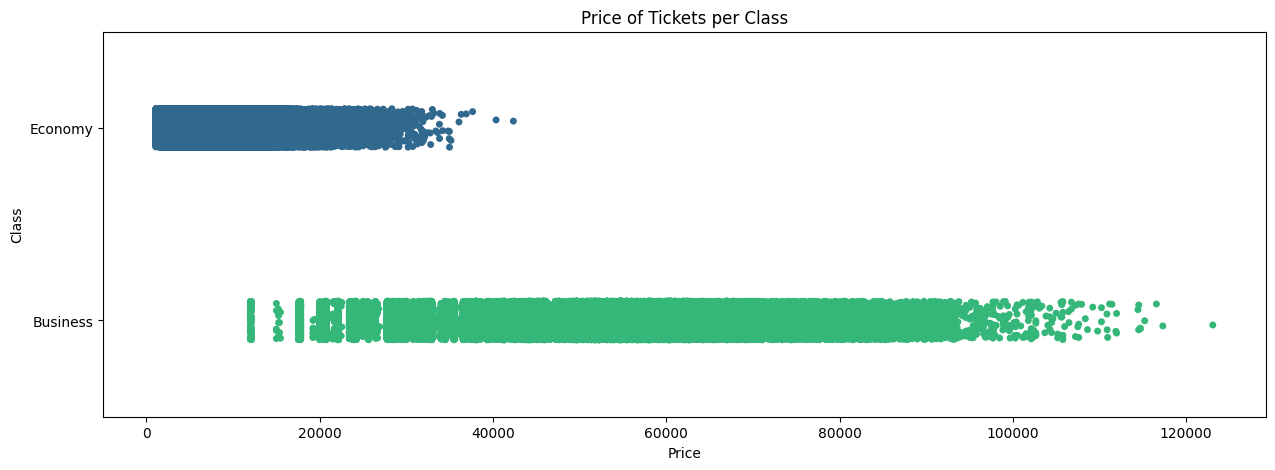

In [7]:
plt.figure(figsize=(15,5))
class_of_travel  = sns.stripplot(x='price',y='class',data=df,palette='viridis')
class_of_travel.set(xlabel='Price', ylabel='Class',title='Price of Tickets per Class')
plt.show(class_of_travel)

* From the above figure, we can see 'Economy' class tickets usually cost between 2000-25000 while 'Business' class tickets usually cost between 25000-95000 

3. *_What is availability of Tickets according to class of travel_*?

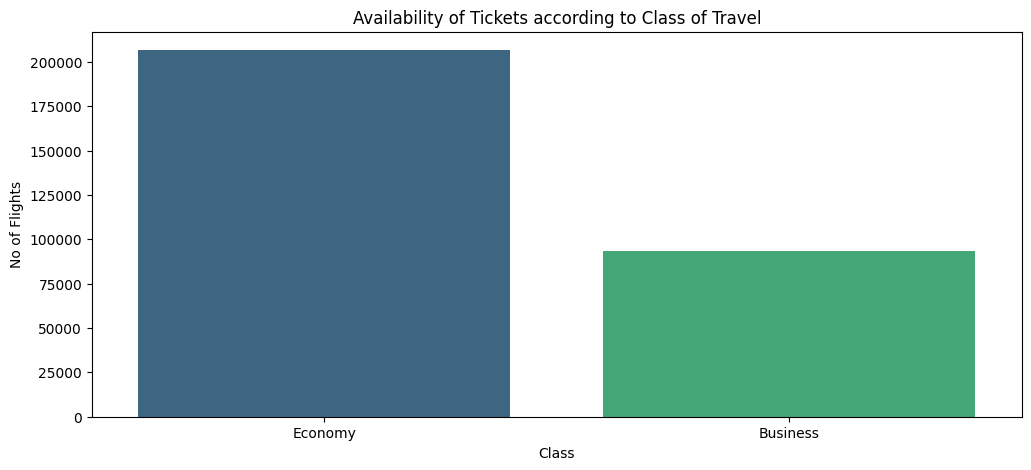

In [8]:
plt.figure(figsize=(12,5))
TA = sns.countplot(x='class',data=df,palette='viridis')
TA.set(xlabel='Class',ylabel='No of Flights',title='Availability of Tickets according to Class of Travel')
plt.show(TA)

- From the above figure, we can see that availiblity of 'Economy' tickets is almost twice than availblity of 'Business' class tickets which is explained by the fact that only 2 airline - 'Air India','Vistata' offer 'Business' class tickets while all airlines offer 'Economy' class tickets.

4. * What is the price of tickets for different airlines based on duration of flight? 

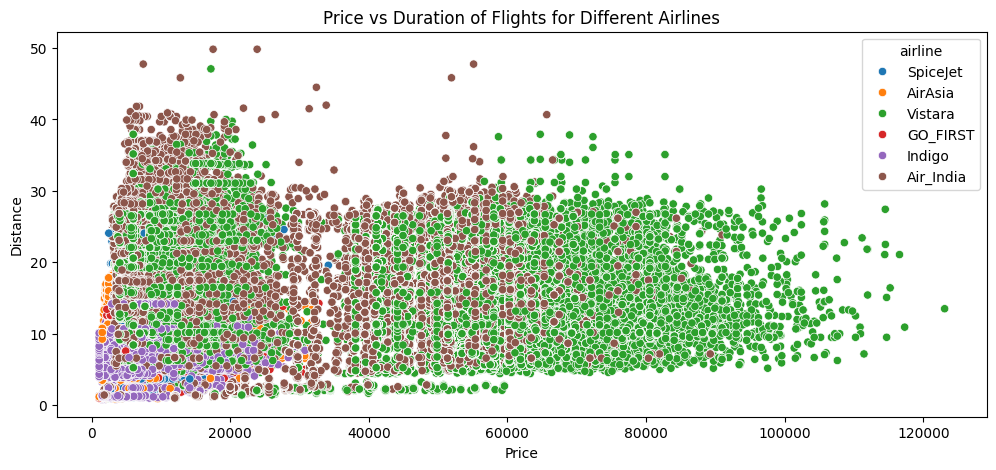

In [9]:
plt.figure(figsize=(12,5))
PDA = sns.scatterplot(x=df['price'],y=df['duration'],data=df,hue=df['airline'])
PDA.set(xlabel='Price',ylabel='Distance',title='Price vs Duration of Flights for Different Airlines')
plt.show(PDA)

From the above chart, we can see the distribution of tickets price varying with duration of flight. We see that more no. of green and brown points in the figure is explained by the fact that 'Vistara' and 'Air_Indaa' have maximum no. of flights.

5. How do ticket prices vary across different airlines and class of travel?

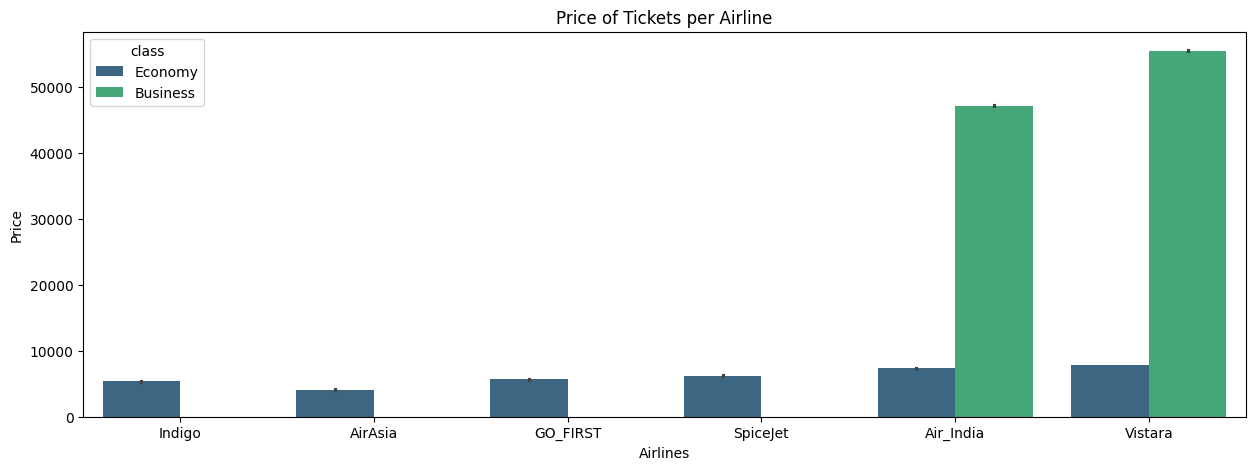

In [10]:
plt.figure(figsize=(15,5))
TP = sns.barplot(data=df.sort_values(by='price'),x='airline',y='price',palette='viridis',hue='class')
TP.set(xlabel='Airlines',ylabel='Price',title='Price of Tickets per Airline')
plt.show(TP)

_From the above figure, we can conclude that 'AirAsia' offers the chepest 'Economy' class tickets while 'Indigo','Go First','Spice Jet' are almost similaly Priced. Meanwhile 'Air India' and 'Vistara' are priced much higher than other 4 airline which can be explained on the basis that 'Air India' and 'Vistara' are both FSCs while rest are LCCs_.

_'Business' class tickets for 'Vistara' cost much higher than 'Air India' which can be due to better sevice, quality of seats available on 'Vistara' as compared to 'Air India'_.

6. How does airline tickets prices vary depending on when you buy them?

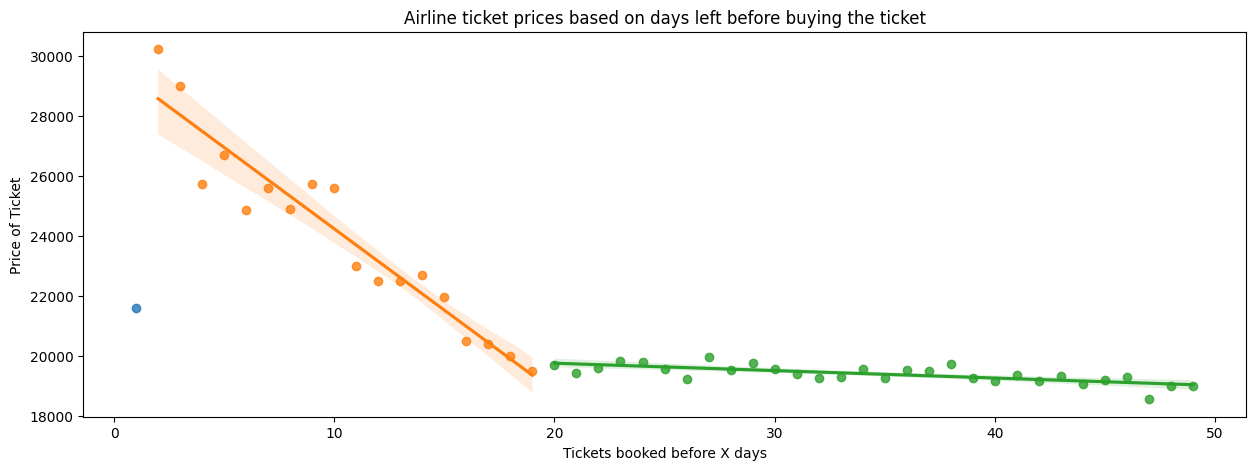

In [11]:
df.head(5)
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp['days_left'] == 1].days_left, y=df_temp.loc[df_temp['days_left'] == 1].price,data = df_temp,fit_reg= False,ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

_From the above figure, we can conclude that ticket price rise slowly till 20 days from the date of flight, then rise sharply till the last day, while dramatically reducing just 1 day before the date of flight. This can be explained by the fact that people usually buy flight tickets within 2-3 weeks of flight which generates more profits for airlines. On last day, prices show dramatic reduction as airlines hope to fill the flight completely due to increase the load factor and decrease the operational cost per passenger_.

7. How does  price of ticket vary depending on duration of flight?

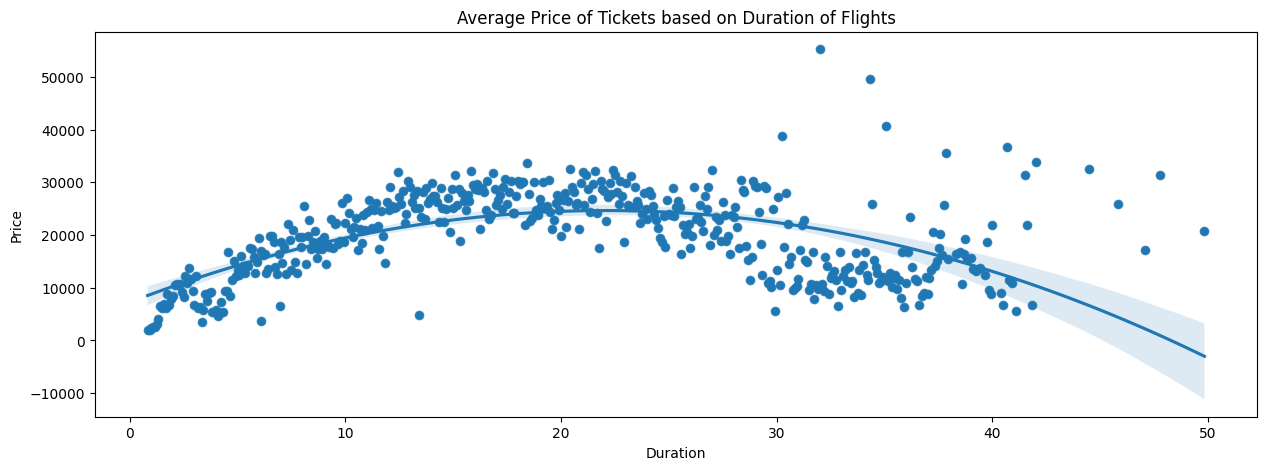

In [15]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x=df_temp2['duration'],y=df_temp2['price'],data=df_temp2)
PD = sns.regplot(x=df_temp2['duration'],y=df_temp2['price'],data=df_temp2,order=2)
PD.set(xlabel='Duration',ylabel='Price',title='Average Price of Tickets based on Duration of Flights')
plt.show(PD)

*_From the above figure, we can see that the relationship is not linear but can be approximated by second degree curve. We can see linear growth of prices as duration of flight increase till 20 and then down again. Some outliers may be affecting the curve_*.

8.How does ticket price vary according to departure time and arriaval time?

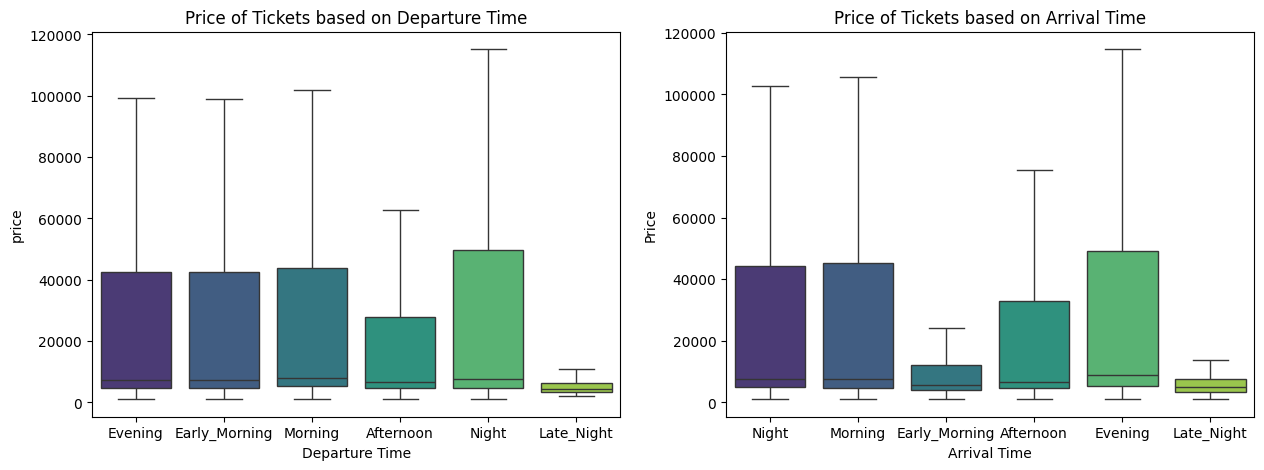

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='departure_time', y='price', palette='viridis',showfliers=False).set(xlabel='Departure Time',ylabel='price',title='Price of Tickets based on Departure Time')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='arrival_time',y='price',palette='viridis',showfliers=False).set(xlabel='Arrival Time',ylabel='Price',title='Price of Tickets based on Arrival Time')
plt.show()

From the above figure, we can conclude that flights departing 'Late_Night' are cheapest while those arriving early morning and late night are cheap too. Flights departing in afternoot are relativly cheap as well.

9.How does tickets price vary depending on source and destination?

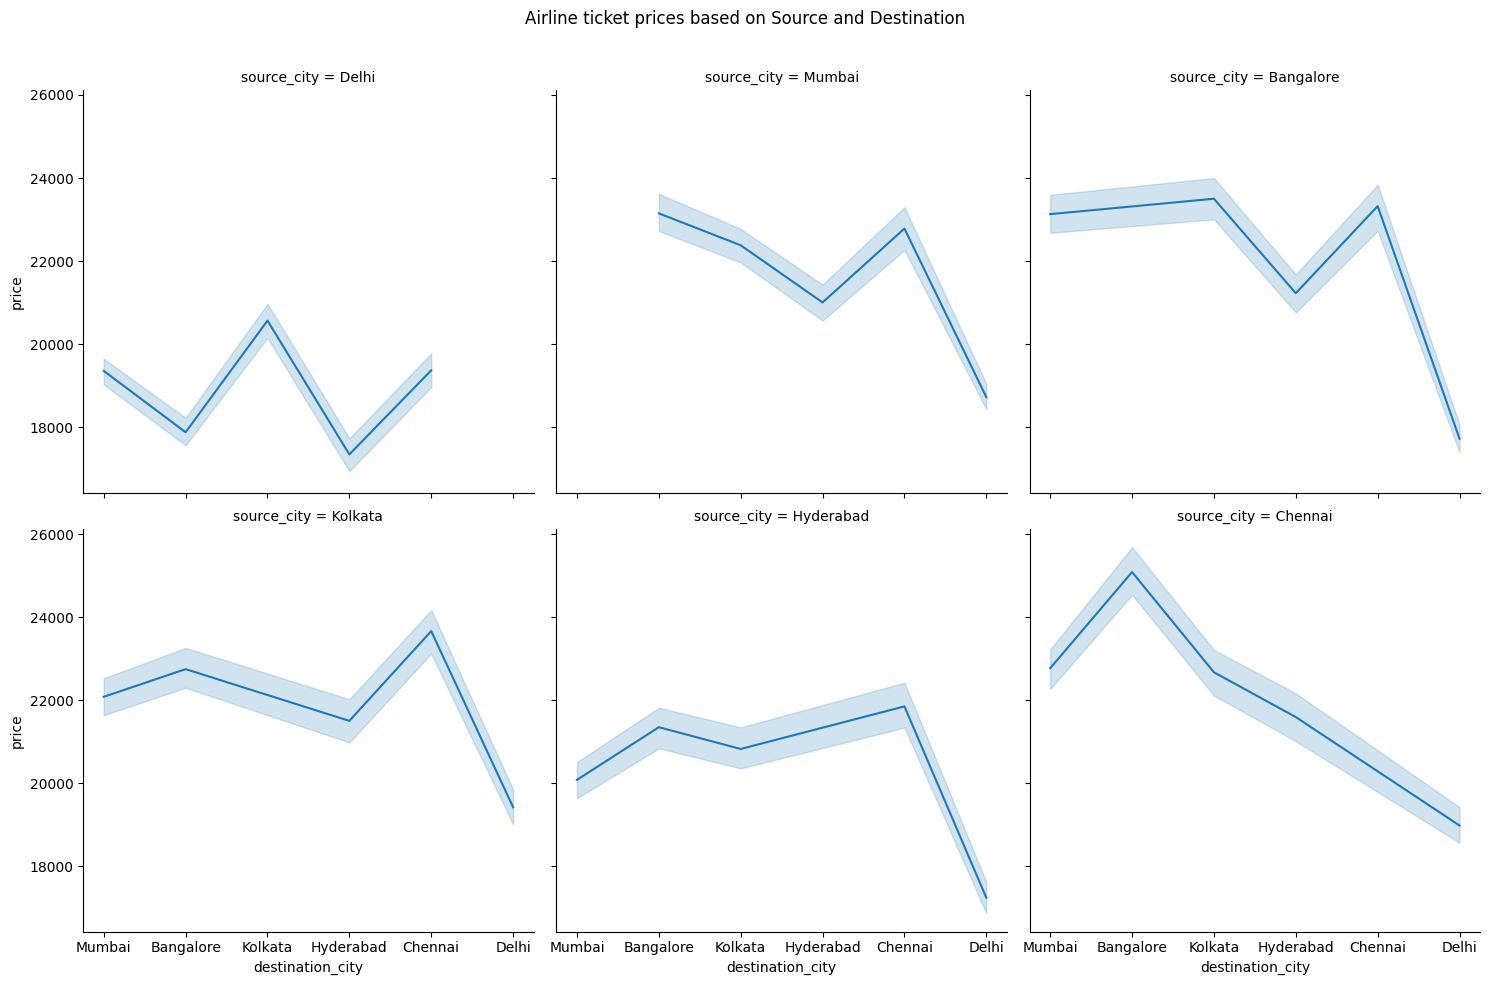

In [23]:
ax = sns.relplot(x='destination_city',y='price', col='source_city',col_wrap=3,data=df,kind='line')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on Source and Destination')
plt.show(ax)

*_From the above figure, we can conclude that flight departing fro Delhi are usually cheper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of frequencies resulting in cheper ticket prices. Chennai-Bangalore seems to be the most expensive route to fly while Hyderabad is most expensive city to fly_*.

10. How does price of tickets vary based on no. of stops and airline?

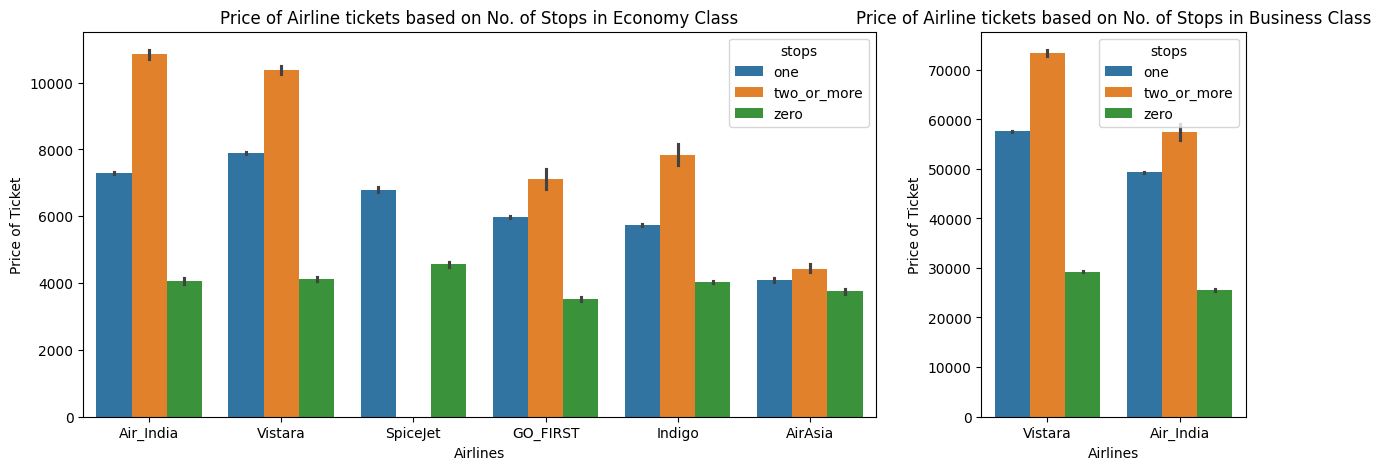

In [24]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)

*_From the above figure, we can conclude that Non-Stop flights are generally the cheapest while One-Stop flights are more expensive and 2+ stop flights are most expensive which can be explained on basis that as one undertakes more flights to fly to destination, it costs more. 'Air Asia' seems to be an exception in this case which shows little variation in prices between its Non-Stop, One Stop and 2+ Stop flights._*